#Results of Traffic Simulation Study

This notebook presents the results of a traffic simulation over a 1km stretch of road with 30 cars.  The cars are modelled to accelerate 2m/s/s up to a max of 34m/s.  Cars will randomly slow by 2m/s/s and also will slow to a speed equal to the distance between themselves and the car in front of them if they approach another car.  The road is one lane and modelled as circular.

In [1]:
from simulation import Simulation
from car import Car
from simulation import n_simulations
import numpy as np


In [2]:
%matplotlib inline

##Run Nine Simulations for Display

In [6]:
nine_simulations = n_simulations(9)

###Show result matrices for first simulation.  The first is the location of cars, the second is speed.

In [7]:
nine_simulations[0]

array([[[  5,  39,  73, ..., 926, 960, 995],
        [  5,  39,  73, ..., 926, 960, 995],
        [  7,  41,  75, ..., 928, 962, 997],
        ..., 
        [928, 951, 988, ..., 855, 900, 913],
        [940, 963,   6, ..., 889, 908, 923],
        [954, 973,  26, ..., 903, 918, 935]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  2,   2,   2, ...,   2,   2,   2],
        [  4,   4,   0, ...,   4,   4,   4],
        ..., 
        [ 12,  12,  18, ...,  34,   8,  10],
        [ 14,  10,  20, ...,  14,  10,  12],
        [ 12,  12,  22, ...,  10,  12,  14]]])

###Show result matrices for last simulation.  The first is the location of cars, the second is speed.

In [8]:
nine_simulations[8]

array([[[  5,  39,  73, ..., 926, 960, 995],
        [  5,  39,  73, ..., 926, 960, 995],
        [  7,  41,  75, ..., 928, 962, 995],
        ..., 
        [ 75,  82,  99, ..., 312,  59,  66],
        [ 75,  86, 105, ..., 346,  61,  70],
        [ 77,  92, 113, ..., 380,  65,  70]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  2,   2,   2, ...,   2,   2,   0],
        [  4,   4,   4, ...,   4,   4,   2],
        ..., 
        [  0,   4,   6, ...,  34,   2,   4],
        [  2,   6,   8, ...,  34,   4,   0],
        [  0,   4,  10, ...,  34,   0,   2]]])

In [9]:
nine_simulations[8][0].shape

(121, 30)

The results matrices are 121 rows by 30 columns.  The first 61 rows are 1 row for setting up the cars and 60 seconds to get cars up to speed.  The rows 61 to 121 are the speeds we will use for analysis.

##Display of 9 Simulations

A scatter plot is the best way to show the cars' movement over time.  The x axis is time, the y axis is location.  As an example, the 9th simulation is displayed below.

To give a recommendation for a new speed limit, take the mean speed of cars in the simulation and add the standard deviation of the speeds.

The first 61 time points set the cars in motion, so the mean of the last 60 data points will be used.

In [11]:
import matplotlib.pyplot as plt

In [36]:
speeds = nine_simulations[8][1][61:]

In [40]:
speeds

array([[19, 21, 23, ..., 34, 15, 17],
       [21, 23, 25, ..., 32, 13, 19],
       [23, 21, 27, ..., 13, 15, 21],
       ..., 
       [ 0,  4,  6, ..., 34,  2,  4],
       [ 2,  6,  8, ..., 34,  4,  0],
       [ 0,  4, 10, ..., 34,  0,  2]])

In [42]:
print(np.mean(speeds))
print(np.std(speeds))

19.5144444444
11.5416546196


#Based on data from one simulation, the average speed plus one standard deviation is 31 m/s.   This is the recommended speed limit.

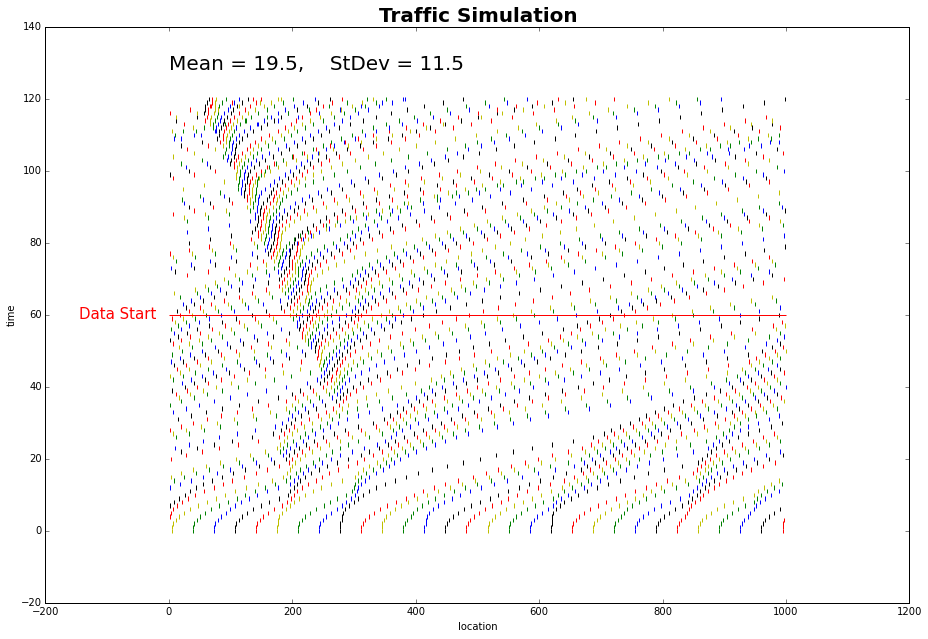

In [53]:
location = nine_simulations[8][0]
y = [[i] * 30 for i in range(121)]
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
plt.scatter(location, y, marker="|", c = ["y","g","b","k","r"])
#plt.scatter(location_array, times)
plt.xlabel("location")
plt.hlines(60, 0, 1000, color="red")
plt.text( 0, 128, 'Mean = 19.5,    StDev = 11.5', fontsize=20)
plt.text( -145, 59, 'Data Start', fontsize=15, color="red")
plt.ylabel("time")
plt.title("Traffic Simulation", fontsize=20, fontweight='bold')

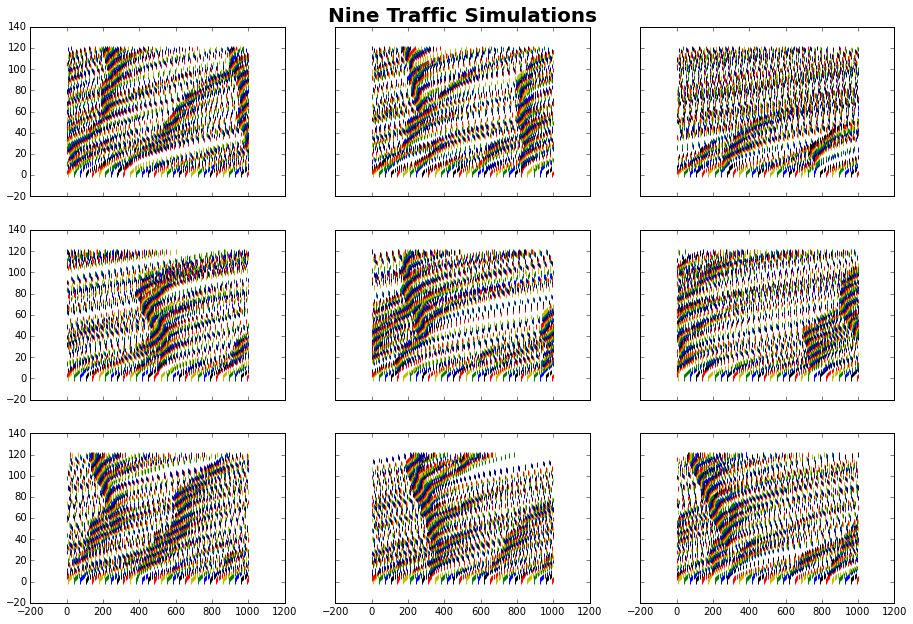

In [34]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * 30 for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations", fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

In [56]:
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]

In [68]:
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]

Next, calculate the mean speeds for the nine simulations.

In [69]:
print(mean_speeds)

[16.451111111111111, 16.370000000000001, 33.517777777777781, 24.201111111111111, 20.602777777777778, 24.321666666666665, 17.638888888888889, 17.039999999999999, 19.514444444444443]


And the standard deviations.

In [70]:
print(stdevs)

[8.7893147810843395, 10.050029850701938, 1.2232541098577803, 10.845459822683042, 11.095969891789819, 9.7347246437117523, 10.161727701357837, 10.85656790457586, 11.541654619595263]


Finally, the mean of the means and the mean of the standard deviations of the 9 simulations

In [71]:
print(np.mean(mean_speeds))
print(np.mean(stdevs))

21.0730864198
9.36652259171


###With nine simulations, the speed limit recommendation would be 30.43.

##To further analyze the data, 1000 simulations are run to look at the mean of the mean speeds and the mean of the standard deviations.

In [72]:
data_set = n_simulations(1000) 

In [73]:
data_speeds = [data_set[i][1][61:] for i in range(len(data_set))]

In [74]:
data_mean_speeds = [np.mean(data_speeds[i]) for i in range(len(data_speeds))]
data_stdevs = [np.std(data_speeds[i]) for i in range(len(data_speeds))]

Calculate the mean speed over 1000 simulations, and the mean standard deviation.

In [75]:
print(np.mean(data_mean_speeds))
print(np.mean(data_stdevs))

21.9757433333
9.59847591442


The speed limit recommendation using this data is 31.58 m/s.

Next lets look at the slowest and fastest mean speed over 1000 trials.

In [78]:
print("Slowest: {}".format(np.min(data_mean_speeds)))
print("Fastest: {}".format(np.max(data_mean_speeds)))

Slowest: 13.96111111111111
Fastest: 33.69555555555556


Lastly, we can do a histogram of the mean speeds over 1000 trials.

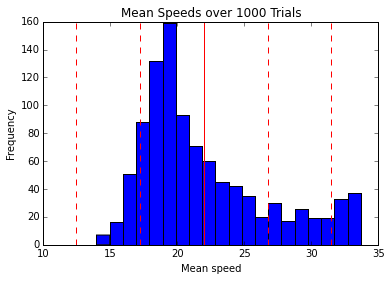

In [85]:
plt.hist(data_mean_speeds, bins = 20)
ymin, ymax = plt.ylim()
mean = np.mean(data_mean_speeds)
stdev = np.std(data_mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 1000 Trials")
plt.show()

#Conclusion
Since the mode of the average is 19, with the second most common average speed being 18, I would suggest making that the base from which you add the standard deviation.  Using this data, a better recommendation would be at 28.5 m/s, using the average standard deviation of 9.5.

##Plotting one trial in 3D: Time/Speed/Location

In [86]:
from mpl_toolkits.mplot3d import Axes3D

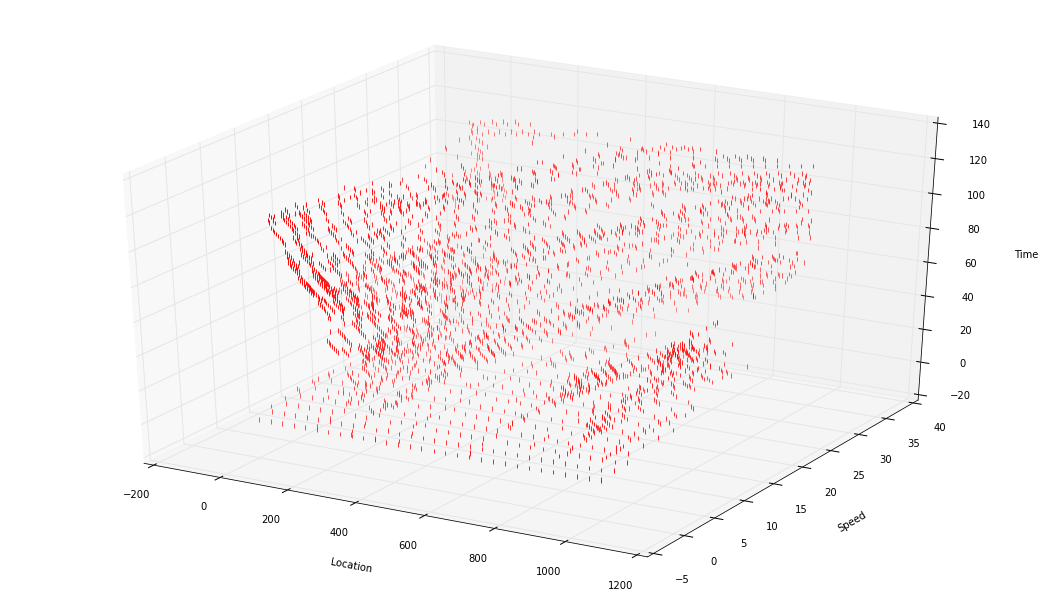

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5,10.5)
x = nine_simulations[8][0]
z = [[i] * 30 for i in range(121)]
y = nine_simulations[8][1]
#plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
#plt.scatter(location, y, marker="|", c = ["y","g","b","k","r"])

ax.scatter(x, y, z, marker="|", c = ["r"])

ax.set_xlabel('Location')
ax.set_zlabel('Time')
ax.set_ylabel('Speed')

plt.show()